# ITS307 Data Analytics : Autumn Semester 2022
# Practical 10 

# Evaluation metrics

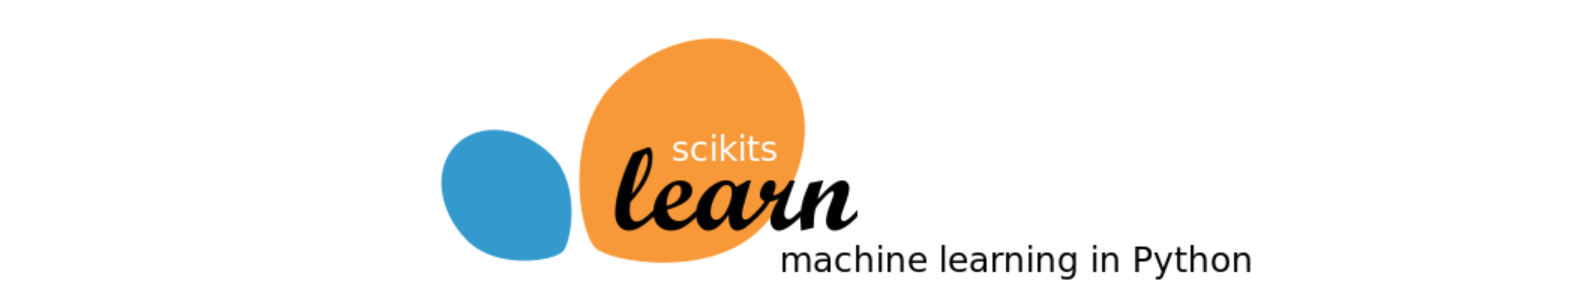

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> Handling Missing values</li>

<li> Scaling Numerical Features  </li>
<li> Encode Categorical Features  </li>
<li> Training Model</li>
<li> Evaluating Model</li>
<li> Making Prediction</li>
</ol>

# 0. Learning Objectives

For this test, we will use the Credit Card Approval dataset from the UCI Machine Learning Repository. Dataset has mixture of both numerical and categorical features with number of missing entries. The features of this dataset have been anonymized to protect the privacy, but some blog gives pretty good overview of the probable features. The probable features in a typical credit card application are `Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income` and finally the `ApprovalStatus`. For your understanding map the features descriptions given here with respect to columns in the dataset.

Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
  #### By the end of this lab, you should be able to predict whether an applicant will be getting credit card approval or not.

# 1. Importing Libraries 

Import all the necessary libraries here. If you don't remember all the libraries in this step, you may choose to import when required.

In [1]:
import pandas as pd


In [6]:
df = pd.read_csv('creditcard.txt', sep=",", names = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus'])

# 2. Loading and Cleaning Data with Pandas


##  2.1.  Load data
- To load data, mention feature names given above in section 1 and display first five and last five records.

In [7]:
# First Five
df.head()

Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

  ZipCode  Income ApprovalStatus  
0   00202       0              +  
1   00043     560              +  
2   00280     824              +  
3   00100       3              +  
4   00120       0              +

In [8]:
# Last Five
df.tail()

Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
685      b  21.08  10.085       y            p              e         h   
686      a  22.67   0.750       u            g              c         v   
687      a  25.25  13.500       y            p             ff        ff   
688      b  17.92   0.205       u            g             aa         v   
689      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
685           1.25            f        f            0              f       g   
686           2.00            f        t            2              t       g   
687           2.00            f        t            1              t       g   
688           0.04            f        f            0              f       g   
689           8.29            f        f            0              t       g   

    ZipCode  Income ApprovalStatus  
685   00260       0              -  
686   00200     394              -  
687   00200       1              -  
688   00280     750              -  
689   00000       0              -

## 2.2.  Print summary of the dataset

In [9]:
df.describe()

Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000

## 2.3. Check null values for all the colums in the dataset

In [11]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 2.4. Check datatypes of all the columns

In [12]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

## 2.5 Cleaning data
- There are some columns which contains value as "?". Replace them with np.nan.

In [14]:
import numpy as np

In [23]:
Cln_df = df.replace( '?', np.NaN)

In [24]:
Cln_df.isna().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

## 2.6 Type conversion
- Some numerical features are not in expected types. Convert their types.

In [51]:
df  = Cln_df.astype({'Age': 'float64', 'ZipCode':'float64'})
df.dtypes

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode           float64
Income              int64
ApprovalStatus     object
dtype: object

# 3. Handling Missing Values

- Before handling missing value, store all the categorical data in `categorical_features` and numerical data in `numerical features`


- Print missing values of both categorical and numerical features before handling missing values

In [53]:
categorical_features = df.select_dtypes(include = ['object'])
categorical_features.head()

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault Employed  \
0      b       u            g              w         v            t        t   
1      a       u            g              q         h            t        t   
2      a       u            g              q         h            t        f   
3      b       u            g              w         v            t        t   
4      b       u            g              w         v            t        f   

  DriversLicense Citizen ApprovalStatus  
0              f       g              +  
1              f       g              +  
2              f       g              +  
3              t       g              +  
4              f       s              +

In [57]:
numerical_features = df.select_dtypes(include = ['number'])
numerical_features.head()

Age   Debt  YearsEmployed  CreditScore  ZipCode  Income
0  30.83  0.000           1.25            1    202.0       0
1  58.67  4.460           3.04            6     43.0     560
2  24.50  0.500           1.50            0    280.0     824
3  27.83  1.540           3.75            5    100.0       3
4  20.17  5.625           1.71            0    120.0       0

## 3.1. Handling Missing values for Categorical variable
- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [65]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy = 'most_frequent')

data = impute.fit_transform(categorical_features)
c_df = pd.DataFrame(data, columns = categorical_features.columns)

In [66]:
c_df.isnull().sum()

Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
DriversLicense    0
Citizen           0
ApprovalStatus    0
dtype: int64

In [69]:
c_df.head()

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault Employed  \
0      b       u            g              w         v            t        t   
1      a       u            g              q         h            t        t   
2      a       u            g              q         h            t        f   
3      b       u            g              w         v            t        t   
4      b       u            g              w         v            t        f   

  DriversLicense Citizen ApprovalStatus  
0              f       g              +  
1              f       g              +  
2              f       g              +  
3              t       g              +  
4              f       s              +

## 3.2. Handling Missing values for numerical variable

- Use sklearn SimpleImputer to impute numerical values with most frequest values. 

- Check missing records after imputation

In [62]:
n_impute = SimpleImputer()

data_n = n_impute.fit_transform(numerical_features)
n_df = pd.DataFrame(data_n, columns = numerical_features.columns)

In [63]:
n_df.isnull().sum()

Age              0
Debt             0
YearsEmployed    0
CreditScore      0
ZipCode          0
Income           0
dtype: int64

In [68]:
n_df.head()

Age   Debt  YearsEmployed  CreditScore  ZipCode  Income
0  30.83  0.000           1.25          1.0    202.0     0.0
1  58.67  4.460           3.04          6.0     43.0   560.0
2  24.50  0.500           1.50          0.0    280.0   824.0
3  27.83  1.540           3.75          5.0    100.0     3.0
4  20.17  5.625           1.71          0.0    120.0     0.0

# 4. Scaling Numerical Features
- Use any scaling techniques to scale all the numerical features

In [70]:
# Max - Min Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
n_df1 = scaler.fit_transform(n_df)
n_df1 = pd.DataFrame(n_df1, columns = n_df.columns)
n_df1.head()

Age      Debt  YearsEmployed  CreditScore  ZipCode   Income
0  0.256842  0.000000       0.043860     0.014925   0.1010  0.00000
1  0.675489  0.159286       0.106667     0.089552   0.0215  0.00560
2  0.161654  0.017857       0.052632     0.000000   0.1400  0.00824
3  0.211729  0.055000       0.131579     0.074627   0.0500  0.00003
4  0.096541  0.200893       0.060000     0.000000   0.0600  0.00000

In [71]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
n_df2 = scaler.fit_transform(n_df1)
n_df2 = pd.DataFrame(n_df2, columns = n_df.columns)
n_df2.head()

Age      Debt  YearsEmployed  CreditScore   ZipCode    Income
0 -0.062321 -0.956613      -0.291083    -0.288101  0.104544 -0.195413
1  2.288101 -0.060051       0.244190     0.740830 -0.819689 -0.087852
2 -0.596738 -0.856102      -0.216324    -0.493887  0.557942 -0.037144
3 -0.315599 -0.647038       0.456505     0.535044 -0.488360 -0.194837
4 -0.962303  0.174141      -0.153526    -0.493887 -0.372104 -0.195413

# 5. Encode Categorical data
- Since we are not aware of the type of categorical data, lets encode all features using OrdinalEncoder. If you are familiar with other encoding techniques, you may use them too.


- Use LabelEncoder to encode Target variable and store in variable `y`


- Concatenate Categorical and Numerical features together in single dataframe `X`


In [131]:
cate_df = c_df.iloc[:, 0: 9]
cate_df.head()

Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0     1.0      1.0           0.0            12.0        7.0           1.0   
1     0.0      1.0           0.0            10.0        3.0           1.0   
2     0.0      1.0           0.0            10.0        3.0           1.0   
3     1.0      1.0           0.0            12.0        7.0           1.0   
4     1.0      1.0           0.0            12.0        7.0           1.0   

   Employed  DriversLicense  Citizen  
0       1.0             0.0      0.0  
1       1.0             0.0      0.0  
2       0.0             0.0      0.0  
3       1.0             1.0      0.0  
4       0.0             0.0      2.0

In [137]:
# Ordinal 
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

categ_df = oe.fit_transform(cate_df)

In [139]:
categ_df = pd.DataFrame(categ_df, columns = cate_df.columns) 
categ_df.head()

Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0     1.0      1.0           0.0            12.0        7.0           1.0   
1     0.0      1.0           0.0            10.0        3.0           1.0   
2     0.0      1.0           0.0            10.0        3.0           1.0   
3     1.0      1.0           0.0            12.0        7.0           1.0   
4     1.0      1.0           0.0            12.0        7.0           1.0   

   Employed  DriversLicense  Citizen  
0       1.0             0.0      0.0  
1       1.0             0.0      0.0  
2       0.0             0.0      0.0  
3       1.0             1.0      0.0  
4       0.0             0.0      2.0

In [141]:
Tgt  = c_df['ApprovalStatus']
Tgt

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: ApprovalStatus, Length: 690, dtype: object

In [151]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

label_result = Le.fit_transform(Tgt)
y = label_result

In [150]:
X = pd.concat([n_df1, categ_df], axis = 1)
X.head()

Age      Debt  YearsEmployed  CreditScore  ZipCode   Income  Gender  \
0  0.256842  0.000000       0.043860     0.014925   0.1010  0.00000     1.0   
1  0.675489  0.159286       0.106667     0.089552   0.0215  0.00560     0.0   
2  0.161654  0.017857       0.052632     0.000000   0.1400  0.00824     0.0   
3  0.211729  0.055000       0.131579     0.074627   0.0500  0.00003     1.0   
4  0.096541  0.200893       0.060000     0.000000   0.0600  0.00000     1.0   

   Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  Employed  \
0      1.0           0.0            12.0        7.0           1.0       1.0   
1      1.0           0.0            10.0        3.0           1.0       1.0   
2      1.0           0.0            10.0        3.0           1.0       0.0   
3      1.0           0.0            12.0        7.0           1.0       1.0   
4      1.0           0.0            12.0        7.0           1.0       0.0   

   DriversLicense  Citizen  
0             0.0      0.0  
1             0.0      0.0  
2             0.0      0.0  
3             1.0      0.0  
4             0.0      2.0

# 6. Training Model

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the clases.

In [153]:
from sklearn.model_selection import train_test_split



x_test, x_train, y_test, y_train = train_test_split(X, y, test_size = 0.2, random_state = 5, stratify = y)

In [154]:
x_test, y_train

(          Age      Debt  YearsEmployed  CreditScore  ZipCode   Income  Gender  \
 49   0.152932  0.023750       0.005789     0.000000    0.050  0.00000     1.0   
 74   0.467368  0.250000       0.057018     0.000000    0.080  0.00002     1.0   
 245  0.292030  0.108571       0.071579     0.014925    0.090  0.18027     1.0   
 600  0.236842  0.016429       0.018947     0.059701    0.190  0.00500     0.0   
 313  0.072632  0.357143       0.014561     0.000000    0.040  0.00042     0.0   
 ..        ...       ...            ...          ...      ...      ...     ...   
 661  0.241805  0.125000       0.005789     0.000000    0.108  0.00000     1.0   
 37   0.139098  0.419643       0.017544     0.029851    0.150  0.00551     0.0   
 349  0.211729  0.053571       0.078947     0.014925    0.050  0.00003     1.0   
 293  0.330827  0.086250       0.004386     0.029851    0.110  0.00001     1.0   
 192  0.421053  0.034286       0.087719     0.000000    0.255  0.00600     1.0   
 
      Married 

## 6.2 Train the model
- Use any three different algorithm to train your model. Make sure you specify the right parameters for each one of them.

In [155]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

LogisticRegression()

In [156]:
lr.score(x_train, y_train)

0.9130434782608695

In [157]:
from sklearn.neighbors import KNeighborsClassifier
NN = KNeighborsClassifier(n_neighbors = 3) 

NN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [158]:
NN.score(x_train, y_train)

0.855072463768116

In [159]:
y_pred = NN.predict(x_test) 


# 7. Evaluating the model

- Use score method to check accuracy of all the models


- Build confusion matrix for all the model and visualize using heatmap.


- Find Precision, Recall and F1-score

In [161]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score

0.7807971014492754

In [162]:
from sklearn.metrics import confusion_matrix

Cm = confusion_matrix(y_test, y_pred)
Cm

array([[182,  64],
       [ 57, 249]], dtype=int64)

In [163]:
from sklearn.metrics import precision_score

Ps = precision_score(y_test, y_pred)
Ps

0.7955271565495208

In [164]:
from sklearn.metrics import recall_score

Rs = recall_score(y_test, y_pred)
Rs

0.8137254901960784

In [165]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
f1

0.8045234248788368

# 8. Making Prediction
- Take any sample record from your training data and make prediction.

In [168]:
x_sample = [[0.675489, 0.159286, 0.106667, 0.089552, 0.0215, 0.00560, 0.0, 1.0, 0.0, 10.0, 3.0, 1.0, 1.0, 0.0, 0.0]]


In [169]:
result = NN.predict(x_sample)

C:\Users\sawad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [170]:
result

array([0])

# 9. Improve your model

- Use any technique to improve your model.